In [59]:
import numpy as np
import torch as T
from torch.distributions.categorical import Categorical
import torch.nn as nn
import torch.optim as optim

In [3]:
a = (1,2)
(print(*a))

1 2


In [4]:
def combined_shape(length, shape=None):
    if shape is None:
        return (length,)
    return (length, shape) if np.isscalar(shape) else (length, *shape)

In [7]:
a = combined_shape(10, 10)
a

(10, 10)

In [8]:
log_std = -0.5 * np.ones(4, dtype=np.float32)

In [13]:
log_std = T.nn.Parameter(T.as_tensor(log_std)).to(T.device("cuda"))

In [14]:
log_std

tensor([-0.5000, -0.5000, -0.5000, -0.5000], device='cuda:0',
       grad_fn=<CopyBackwards>)

In [42]:
m = Categorical(T.nn.Softmax()(T.tensor([ 3, 10, 2, 1 ], dtype=T.float)))
a = []
for i in range(100):
    a.append(m.sample().item())  # equal probability of 0, 1, 2, 3

/home/moonlab/anaconda3/envs/prithvi/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

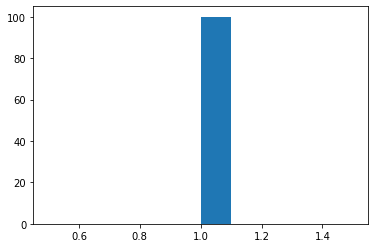

In [43]:
import matplotlib.pyplot as plt 
plt.hist(a)

In [40]:
a = T.nn.Softmax()(T.tensor([ 3, 10, 2, 1 ], dtype=T.float))

/home/moonlab/anaconda3/envs/prithvi/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [52]:
import torch
from torch.distributions import Normal 

means = torch.tensor([0., 0.])
stds = torch.tensor([0.5, 0.5])

dist = Normal(means, stds)

In [53]:
act = dist.sample()
act

tensor([-0.3654,  0.1939])

In [54]:
dist.log_prob(act).exp()

tensor([0.6109, 0.7401])

In [65]:
class ActorNetworkGaussian(nn.Module):
    def __init__(self, n_actions, input_dims, alpha, hidden_sizes, fc1_dims=256, fc2_dims=256, chkpt_dir='tmp/ppo'):
        super(ActorNetworkGaussian, self).__init__()

        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.chkpt_dir = chkpt_dir
        self.checkpoint_file = os.path.join(chkpt_dir, 'actor_torch_ppo')
        log_std = -0.5 * np.ones(n_actions, dtype=np.float32)
        self.log_std = T.nn.Parameter(T.as_tensor(log_std)).to(self.device)

        sizes = [input_dims] + list(hidden_sizes) + [n_actions]
        layers = []

        for j in range(len(sizes)-1):
            act = nn.Tanh if j < len(sizes)-2 else nn.Identity
            layers += [nn.Linear(sizes[j], sizes[j+1], act())]

        self.actor = nn.Sequential(*layers)
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.to(self.device)

    def forward(self, state):
        mu = self.actor(state)
        std = T.exp(self.log_std)
        
        return Normal(mu, std), mu, std

    def save_checkpoint(self):
        os.makedirs(self.chkpt_dir, exist_ok = True)
        T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
        self.load_state_dict(T.load(self.checkpoint_file))

In [74]:
act = ActorNetworkGaussian(4, 22, 0.003, (256, 256))

In [79]:
n, mu, std = act(T.rand(1, 22).to(T.device("cuda")))

In [80]:
n.sample()

tensor([[-0.6504, -0.1800, -0.7941, -0.1803]], device='cuda:0')

In [85]:
def test(i, **kwargs):
    print(i)
    if kwargs:
        print(kwargs["states"])

In [89]:
test(1, **{"states":100})

1
100
